In [24]:
#Image processing imports
import cv2
from PIL import Image, ImageFilter, ImageEnhance

#Graphs & display imports
from matplotlib import pyplot as plt , animation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

#Array and variable maths import
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.io import loadmat
from scipy import signal as sig
from statistics import mean

#GUI imports
from tkinter import filedialog
import tkinter as tk

#file IO imports
import pickle
import argparse

import os

from skimage import measure

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray =  (1/3) * r + (1/3) * g + (1/3) * b 
    gray = gray.astype(np.uint8)
    return gray

(720, 1280, 3)

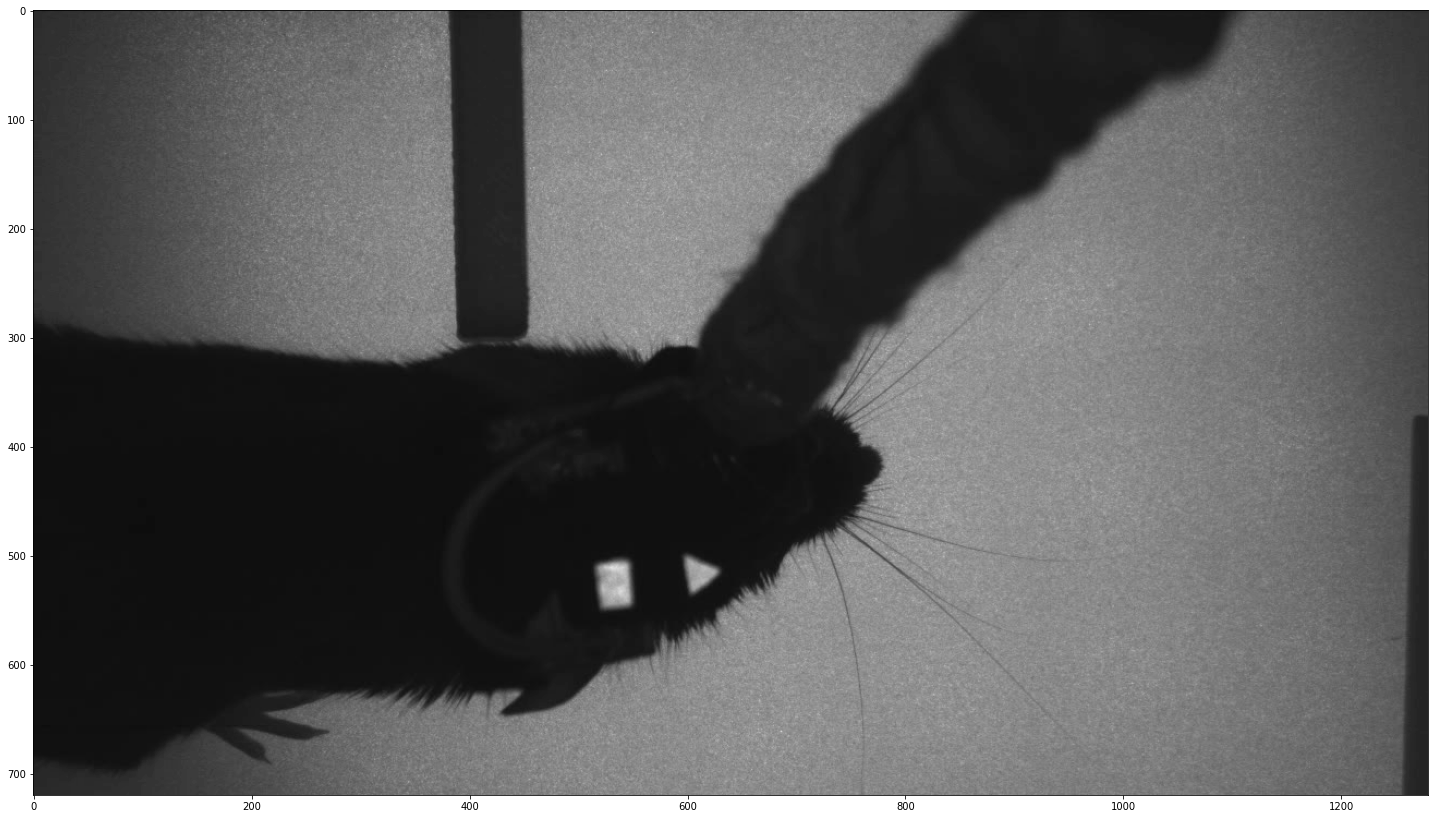

In [26]:
                                                                 ## loadings ##

video_path = r"D:\BehavioralVideos\Whisker_Video\Whisker_Topview\Expect_1\Mouse25\200227_2\Mouse25_2020-02-27T16.38.37.avi"

HandleTOP = cv2.VideoCapture(video_path)
length = int(HandleTOP.get(cv2.CAP_PROP_FRAME_COUNT))

#for framne_nb in range(length-1) :

    
HandleTOP.set(cv2.CAP_PROP_POS_FRAMES, 175)

_ , IMG1 = HandleTOP.read()

display(np.shape(IMG1))

GrayArray = rgb2gray(IMG1)

fig = plt.figure(figsize = (25,35))
plt.imshow(GrayArray, cmap='gray', vmin=0, vmax=255)

Pour mettre en forme l'image vers du niveau de gris, pas forcément besoin de convertir de RGB en BGR etc, il suffit juste de prendre **un seul des 3 calques couleurs** ( qui sont identiques ) via la fonction qu'on avait fait, **rgb2gray**.
### Résultat ci dessus.
----

In [36]:
#thresholding :

ret,thresh2 = cv2.threshold(GrayArray,55,255,cv2.THRESH_BINARY)
detector = cv2.SimpleBlobDetector()
params = cv2.SimpleBlobDetector_Params()

## option With cv2 Blobdetector :

[]

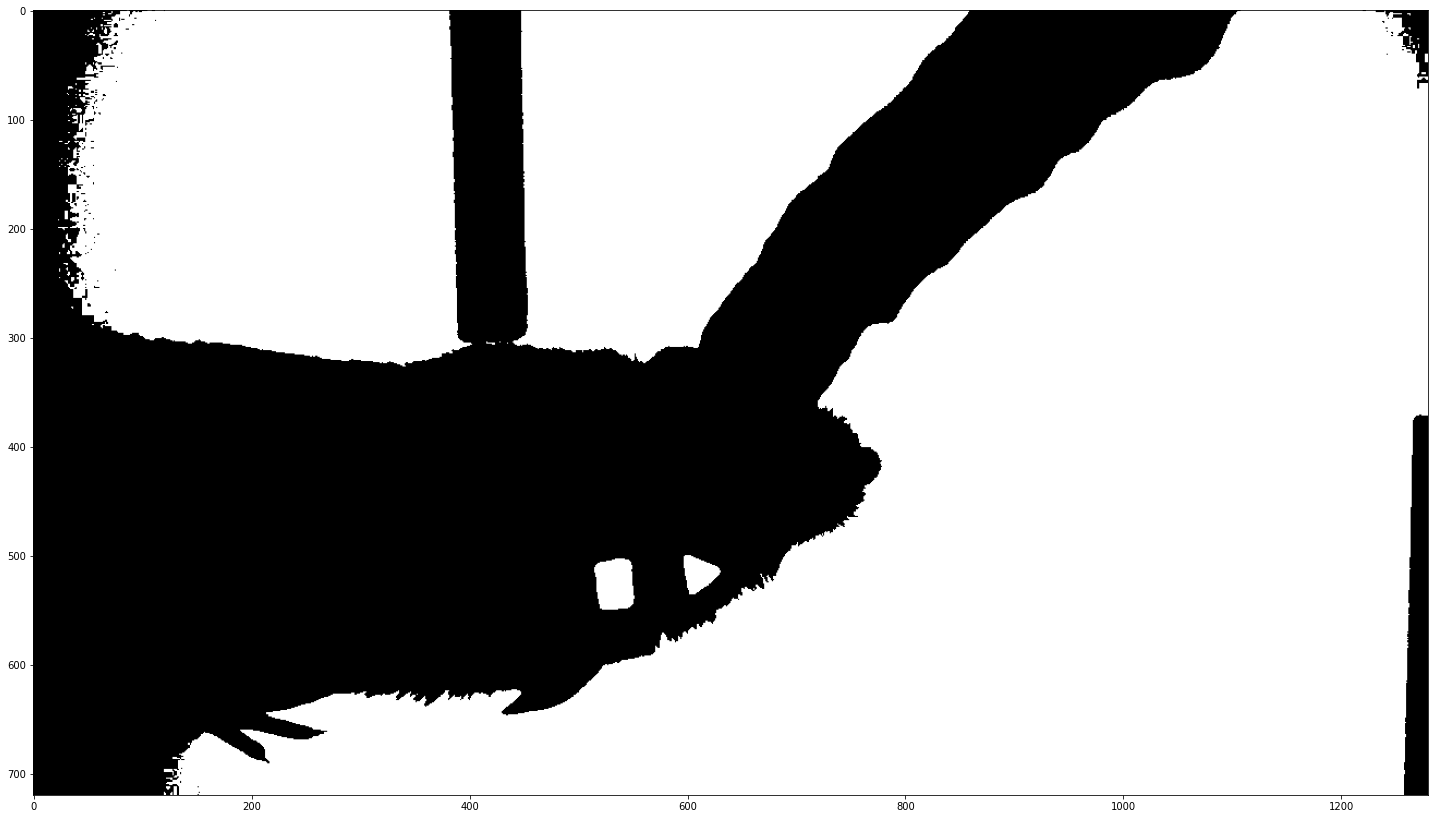

In [37]:
params.filterByArea = True
params.minArea = 40
params.maxArea = 20


# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5
params.maxCircularity = 0.785


# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87



# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01



detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(thresh2)

display(keypoints)
thresh2_with_keypoints = cv2.drawKeypoints(thresh2, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize = (25,35))
plt.imshow(thresh2_with_keypoints, cmap='gray', vmin=0, vmax=1)

 ## Option with skimage measure and skimage regionprops 

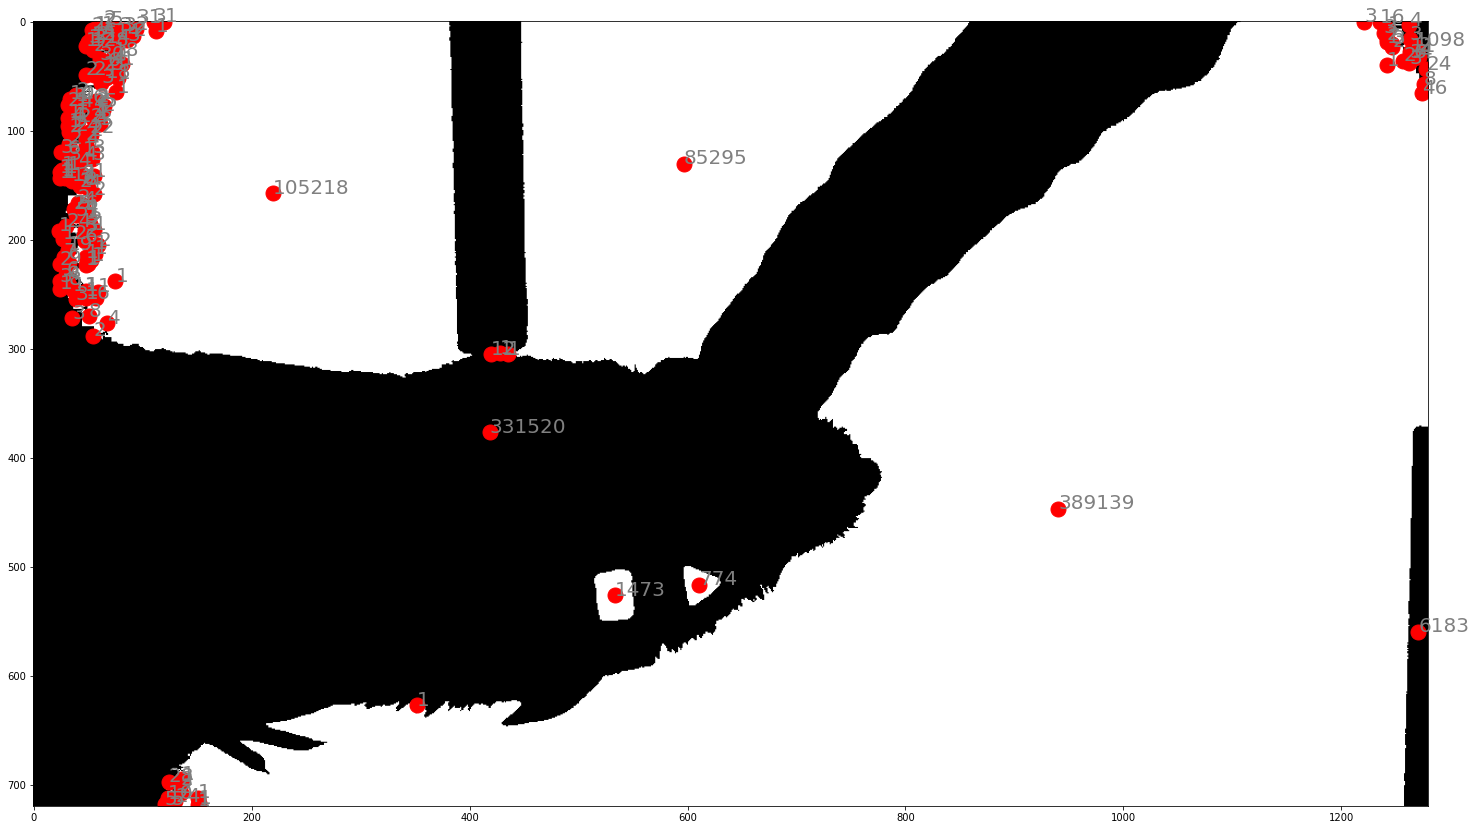

In [45]:
labels = measure.label(thresh2, background=1)
propsa = measure.regionprops(labels)

fig = plt.figure(figsize = (25,35))
plt.imshow(thresh2_with_keypoints, cmap='gray', vmin=0, vmax=1)

for label in propsa:
    object_size = len(label.coords)
    plt.plot(label.centroid[1],label.centroid[0],'o',markersize = 15, color = 'red')
    plt.text(label.centroid[1],label.centroid[0],label.area,fontsize=20,color = 'gray')

résultat ci dessus avec les **regions** trouvées, et les **aires** (en unité par pixel), affichées à côté.
entre **2000 et 500** semble faire l'affaire

In [ ]:
 for framne_nb in range(175,200, 1) :   
    
    HandleTOP.set(cv2.CAP_PROP_POS_FRAMES, framne_nb)
    #Img = cv2.cvtColor(IMG1, cv2.COLOR_BGR2RGB)
    
    _ , IMG1 = HandleTOP.read()

    GrayArray = rgb2gray(IMG1)
    
    
    dim = GrayArray.shape
    
#print(dim)
#print(type(GrayArray)) 
#plt.imshow(GrayArray)


                                                               ## Binarization ##
    
    
    
    #img = cv2.medianBlur(img,5)
    #Bin = cv2.adaptiveThreshold(GrayArray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    
    
    ############  1er paramètre fonction = 55 = val pixel mini  ########################
    ret,thresh2 = cv2.threshold(GrayArray,55,255,cv2.THRESH_BINARY)
    
                            
                                                                ## Blob Detection Params ##
    
    # Set up the detector with default parameters.
    detector = cv2.SimpleBlobDetector()
    params = cv2.SimpleBlobDetector_Params()
	
	# Filter by Area.
    params.filterByArea = True
    params.minArea = 40
    params.maxArea = 20


	# Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.5
    params.maxCircularity = 0.785

	 
	# Filter by Convexity
    params.filterByConvexity = False
    params.minConvexity = 0.87

	 

	# Filter by Inertia
    params.filterByInertia = False
    params.minInertiaRatio = 0.01
	
    
	# Create a detector with the parameters
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3 :
        detector = cv2.SimpleBlobDetector(params)
    else :
        detector = cv2.SimpleBlobDetector_create(params)
    
    
    
                                                                ## Detection and drawing ##
    
    
    keypoints = detector.detect(thresh2)
    
    thresh2_with_keypoints = cv2.drawKeypoints(thresh2, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    cv2.imshow("Keypoints", thresh2_with_keypoints)
    cv2.waitKey(0)
    

    
    
    
                                                            ## Display ##
    
    
    
    
# La fonction rgb2gray renvoie une image (par plt.imshow sans paramètres ajoutés) de couleur bizare (déjà eu le problème : type inversion des couleurs de départ avant de les passés en gray)
# corrigé par un display adaptés (voir paramètres imshow), fct BGR2GRAY ne fait pas son taf, mais problème ne semble pas être génant pour la binarisation, à voir plus tard.
    
    





fig = plt.figure(figsize = (25,35))


plt.subplot(221), plt.imshow(GrayArray, cmap='gray', vmin=0, vmax=255)

plt.subplot(222), plt.imshow(thresh2, cmap='gray', vmin=0, vmax=255)